In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno

In [58]:
df = pd.read_csv("C:/Users/lee/Desktop/핀테크/4. 금융분석모델링/프로젝트/cs-training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [59]:
mask = df['SeriousDlqin2yrs'].notnull()

In [60]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [61]:
df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [62]:
for i in df[df['RevolvingUtilizationOfUnsecuredLines'] > 10000].index:
    df['RevolvingUtilizationOfUnsecuredLines'][i] = 9684

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


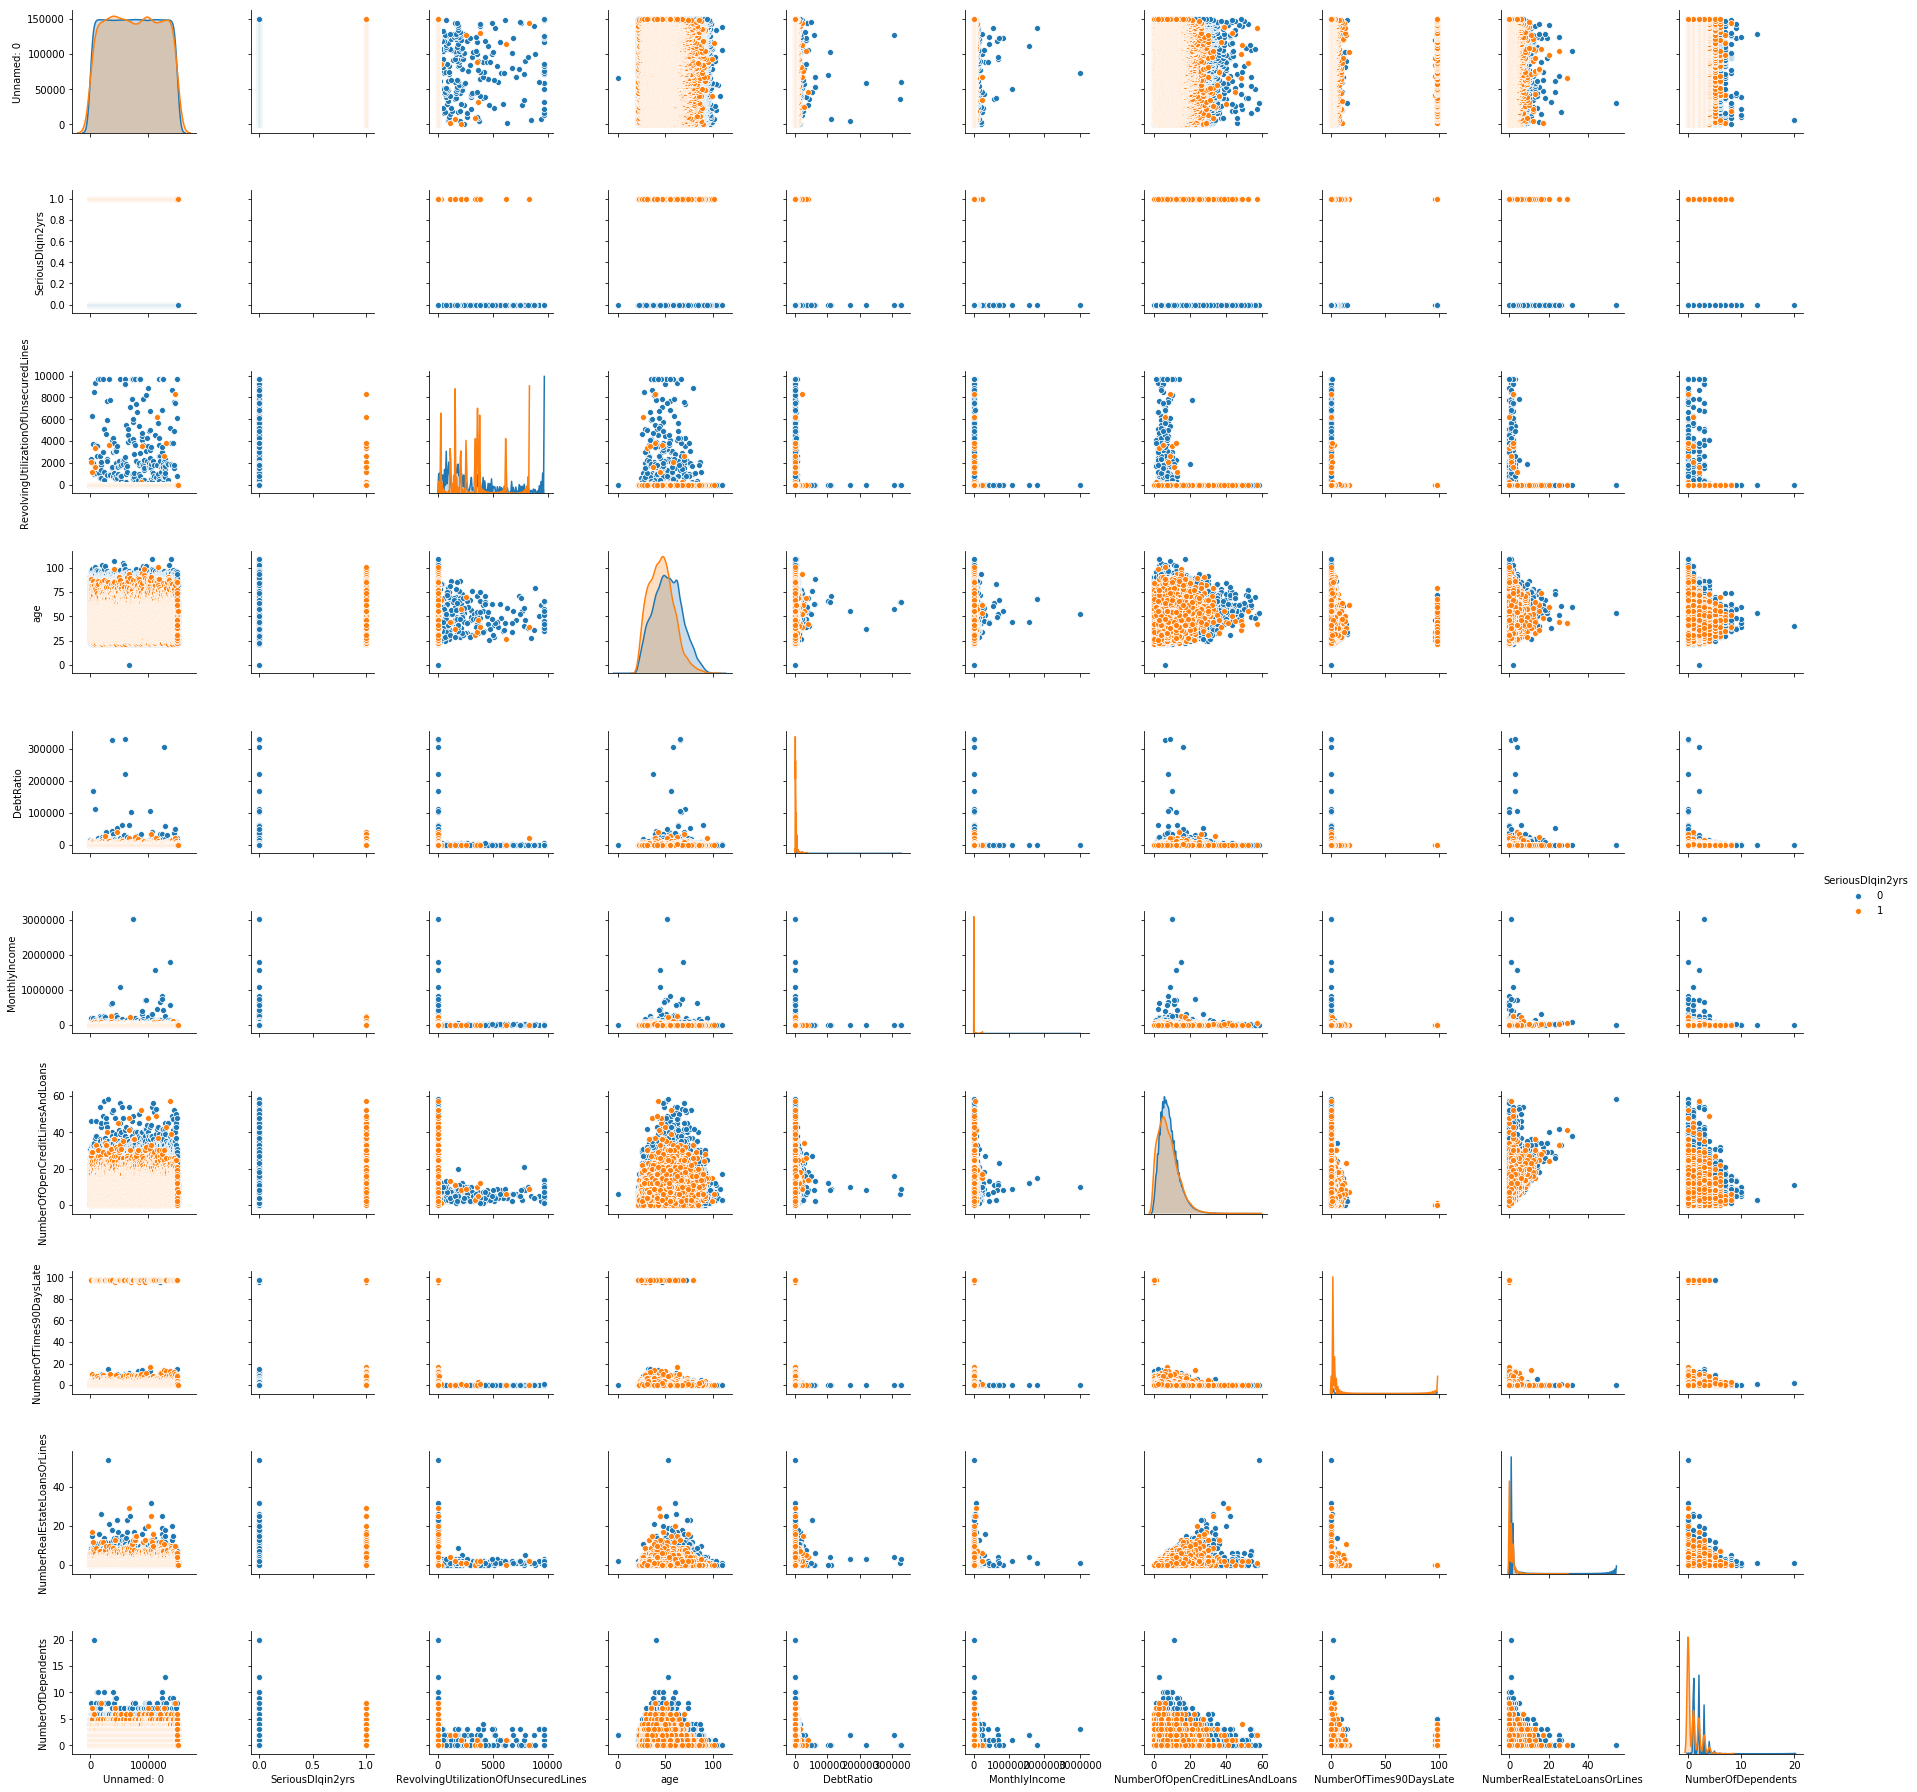

In [63]:
sns.pairplot(data=df, hue="SeriousDlqin2yrs")

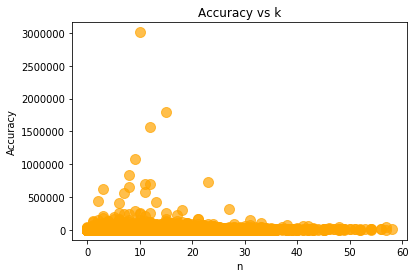

In [64]:
plt.scatter(df['NumberOfOpenCreditLinesAndLoans'],df['MonthlyIncome'],c='orange',marker='o',s=100,alpha=0.7)
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

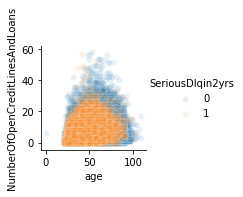

In [65]:
sns.pairplot(df, x_vars=["age"], y_vars=["NumberOfOpenCreditLinesAndLoans"], hue="SeriousDlqin2yrs",plot_kws = {'alpha': 0.1})

In [78]:
bins8 = [0, 0.5, 1.0, 2.0, 5.0, 10, 100, 1000,10000] #0대~10대 합체_나이별로 그룹화
labels8 = ['0-0.5', '0.5-1.0', '1.0-2.0', '2.0-5.0', '5.0-10', '10-100', '100-1000','1000-10000','10000+']
sns.pairplot(df, x_vars=["DebtRatio"], y_vars=["DebtRatio"])

SyntaxError: positional argument follows keyword argument (<ipython-input-78-e416fa7f7c34>, line 3)

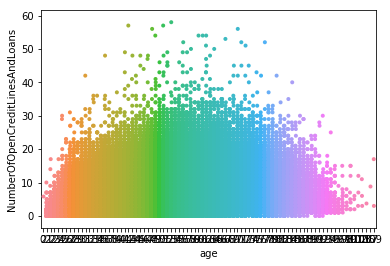

In [66]:
sns.stripplot(x="age",y="NumberOfOpenCreditLinesAndLoans",data=df, edgecolor="gray",size=4)

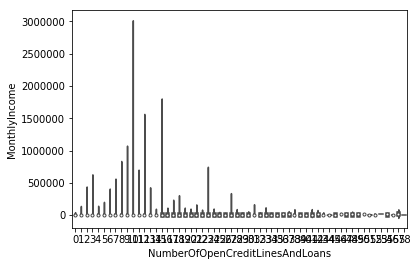

In [71]:
sns.violinplot(x="NumberOfOpenCreditLinesAndLoans",y="MonthlyIncome",data=df, color="orange",size=5)

In [72]:
my_cols_dict = {'1':'red', '0':'green'}
my_cols = df['SeriousDlqin2yrs'].apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(df, c=my_cols, marker='o', alpha=0.5)#알파값은 투명도-오버랩되면 알수 없기떄문
plt.show();

KeyError: 1

### 분석 모델링

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics, preprocessing
%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df.columns

In [ ]:
X=np.array(df.drop(columns='SeriousDlqin2yrs'))
Y=np.array(df.SeriousDlqin2yrs)
print(X)

In [ ]:
table = df.SeriousDlqin2yrs.value_counts()
sns.barplot(table.index,table.values)
plt.show()
table

### 로지스틱회귀 적용

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
print(Y_test)

In [ ]:
glm = LogisticRegression()
glm.fit(X_train,Y_train)
Y_pred_train = glm.predict(X_train)
Y_pred_test = glm.predict(X_test)

In [ ]:
glm

In [ ]:
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

In [ ]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Accuracy    = '+ str(np.round(accuracy,2)))
print('Sensitvity  = '+ str(np.round(sensitivity,2)))
print('Specificity = '+ str(np.round(specificity,2)))

### 로지스틱 회귀적용 (1로 판단하는 기준 조정)

In [ ]:
Y_pred_test_prob=glm.predict_proba(X_test)[:,1]

In [ ]:
threshold = 0.7
Y_pred_test_val = (Y_pred_test_prob > threshold).astype(int)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

In [ ]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Accuracy    = '+ str(np.round(accuracy,2)))
print('Sensitvity  = '+ str(np.round(sensitivity,2)))
print('Specificity = '+ str(np.round(specificity,2)))

In [ ]:
t_grid = np.linspace(0.0,1.0,100)
true_positive=[]
false_positive=[]

In [ ]:
for threshold in t_grid:
    Y_pred_test_val = (Y_pred_test_prob > threshold).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    true_positive.append(sensitivity)
    false_positive.append(1-specificity)          

In [ ]:
plt.plot(false_positive,true_positive,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [73]:
X=np.array(df.drop(columns='SeriousDlqin2yrs'))
Y=np.array(df.SeriousDlqin2yrs)
header = df.columns
headerX = df.drop(columns='SeriousDlqin2yrs').columns

In [ ]:
# estimator_grid
estimator_grid = np.arange(30, 80, 10)
learning_rate_grid = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
parameters = {'n_estimators': estimator_grid, 'learning_rate': learning_rate_grid}
gridCV = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=10)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_learn_rate = gridCV.best_params_['learning_rate']

In [ ]:
print("Ada Boost best n estimator : " + str(best_n_estim))
print("Ada Boost best learning rate : " + str(best_learn_rate))

In [ ]:
AB_best = AdaBoostClassifier(n_estimators=best_n_estim,learning_rate=best_learn_rate,random_state=3)
AB_best.fit(X_train, Y_train);
Y_pred = AB_best.predict(X_test)
print( "Ada Boost best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))